In [198]:
import pandas as pd
import numpy as np

In [199]:
#Bring in zillow data
zillowDataURL="https://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv"
zillowData=pd.read_csv(zillowDataURL, engine='python' )

In [200]:
#Create data frame
zillowDF=pd.DataFrame(zillowData)
print(zillowDF)

       RegionID  RegionName            City State  \
0         61639       10025        New York    NY   
1         84654       60657         Chicago    IL   
2         61637       10023        New York    NY   
3         91982       77494            Katy    TX   
4         84616       60614         Chicago    IL   
...         ...         ...             ...   ...   
30429     66169       20052      Washington    DC   
30430     67023       21759          Keymar    MD   
30431     67346       22649      Middletown    VA   
30432     60206        6230  Pomfret Center    CT   
30433     76819       43738       Fultonham    OH   

                                  Metro            CountyName  SizeRank  \
0           New York-Newark-Jersey City       New York County         1   
1              Chicago-Naperville-Elgin           Cook County         2   
2           New York-Newark-Jersey City       New York County         3   
3      Houston-The Woodlands-Sugar Land         Harris County  

In [201]:
#Column clean up
##Drop RegionID, 1996 data, 2019 data
zillow=zillowDF.drop(columns=['RegionID','1996-04','1996-05','1996-06'
                              ,'1996-07','1996-08','1996-09','1996-10'
                              ,'1996-11','1996-12','2019-01','2019-02'
                              ,'2019-03','2019-04','2019-05','2019-06'
                              ,'2019-07','2019-08','2019-09','2019-10'
                              ,'2019-11','2019-12',])
##Rename RegionName to zipcode
zillow.rename(columns={'RegionName':'zipcode'}, inplace=True)
print(zillow)

       zipcode            City State                             Metro  \
0        10025        New York    NY       New York-Newark-Jersey City   
1        60657         Chicago    IL          Chicago-Naperville-Elgin   
2        10023        New York    NY       New York-Newark-Jersey City   
3        77494            Katy    TX  Houston-The Woodlands-Sugar Land   
4        60614         Chicago    IL          Chicago-Naperville-Elgin   
...        ...             ...   ...                               ...   
30429    20052      Washington    DC   Washington-Arlington-Alexandria   
30430    21759          Keymar    MD   Washington-Arlington-Alexandria   
30431    22649      Middletown    VA                        Winchester   
30432     6230  Pomfret Center    CT                         Worcester   
30433    43738       Fultonham    OH                        Zanesville   

                 CountyName  SizeRank   1997-01   1997-02   1997-03   1997-04  \
0           New York County   

In [202]:
#Had to install uszipcode
##pip install --upgrade uszipcode

In [203]:
#Define search uszipcode function
from uszipcode import SearchEngine as ZSE
zse = ZSE(simple_zipcode=False)
def getZipStats(ser):
    res=zse.by_zipcode(ser.zipcode)
    data = (res.lat, res.lng, res.median_household_income
            , res.population, res.population_density, res.housing_units
            , res.occupied_housing_units, res.radius_in_miles
            , res.land_area_in_sqmi, res.water_area_in_sqmi)
    return pd.Series(data)

In [204]:
#Get zipStats
df=zillow.apply(getZipStats,axis=1)
print(df)


            0       1         2        3         4        5        6  \
0      40.800 -73.970   68516.0  94600.0  125860.0  47617.0  44432.0   
1      41.940 -87.660   75885.0  65996.0   29028.0  41483.0  37865.0   
2      40.780 -73.980  103534.0  60998.0  124357.0  39402.0  34383.0   
3      29.740 -95.840  126425.0  61600.0    1511.0  20283.0  19282.0   
4      41.920 -87.650   86215.0  66617.0   21040.0  37951.0  34850.0   
...       ...     ...       ...      ...       ...      ...      ...   
30429  38.904 -77.032       NaN    470.0  172372.0      6.0      6.0   
30430     NaN     NaN       NaN      NaN       NaN      NaN      NaN   
30431     NaN     NaN       NaN      NaN       NaN      NaN      NaN   
30432     NaN     NaN       NaN      NaN       NaN      NaN      NaN   
30433  39.800 -82.100   43750.0    164.0    1116.0     63.0     55.0   

              7      8     9  
0      0.965909   0.75  0.00  
1      2.000000   2.27  0.78  
2      0.738636   0.49  0.00  
3      6.00

In [205]:
#Append info from uszipcode to zillow
zillow1=pd.concat([zillow,df],axis=1)

In [206]:
print(zillow1)

       zipcode            City State                             Metro  \
0        10025        New York    NY       New York-Newark-Jersey City   
1        60657         Chicago    IL          Chicago-Naperville-Elgin   
2        10023        New York    NY       New York-Newark-Jersey City   
3        77494            Katy    TX  Houston-The Woodlands-Sugar Land   
4        60614         Chicago    IL          Chicago-Naperville-Elgin   
...        ...             ...   ...                               ...   
30429    20052      Washington    DC   Washington-Arlington-Alexandria   
30430    21759          Keymar    MD   Washington-Arlington-Alexandria   
30431    22649      Middletown    VA                        Winchester   
30432     6230  Pomfret Center    CT                         Worcester   
30433    43738       Fultonham    OH                        Zanesville   

                 CountyName  SizeRank   1997-01   1997-02   1997-03   1997-04  \
0           New York County   

In [207]:
#Rename added columns
zillow1.rename(columns={0:'latitude',1:'longitude',2:'median_household_income'
                       ,3:'population',4:'population_density',5:'housing_units'
                       ,6:'occupied_housing_units',7:'radius_in_miles'
                       ,8:'land_area_in_sqmi',9:'water_area_in_sqmi'}, inplace=True)
print(zillow1)

       zipcode            City State                             Metro  \
0        10025        New York    NY       New York-Newark-Jersey City   
1        60657         Chicago    IL          Chicago-Naperville-Elgin   
2        10023        New York    NY       New York-Newark-Jersey City   
3        77494            Katy    TX  Houston-The Woodlands-Sugar Land   
4        60614         Chicago    IL          Chicago-Naperville-Elgin   
...        ...             ...   ...                               ...   
30429    20052      Washington    DC   Washington-Arlington-Alexandria   
30430    21759          Keymar    MD   Washington-Arlington-Alexandria   
30431    22649      Middletown    VA                        Winchester   
30432     6230  Pomfret Center    CT                         Worcester   
30433    43738       Fultonham    OH                        Zanesville   

                 CountyName  SizeRank   1997-01   1997-02   1997-03   1997-04  \
0           New York County   

In [211]:
#Replace null values
zillow2=zillow1.fillna('---')
print(zillow2)

       zipcode            City State                             Metro  \
0        10025        New York    NY       New York-Newark-Jersey City   
1        60657         Chicago    IL          Chicago-Naperville-Elgin   
2        10023        New York    NY       New York-Newark-Jersey City   
3        77494            Katy    TX  Houston-The Woodlands-Sugar Land   
4        60614         Chicago    IL          Chicago-Naperville-Elgin   
...        ...             ...   ...                               ...   
30429    20052      Washington    DC   Washington-Arlington-Alexandria   
30430    21759          Keymar    MD   Washington-Arlington-Alexandria   
30431    22649      Middletown    VA                        Winchester   
30432     6230  Pomfret Center    CT                         Worcester   
30433    43738       Fultonham    OH                        Zanesville   

                 CountyName  SizeRank 1997-01 1997-02 1997-03 1997-04  ...  \
0           New York County      

In [233]:
#Convert Date columns to date types
NewDateCols=pd.Index.to_series(pd.date_range(start='1997-01',periods=264,freq='M').to_period('M'))
cols=list(zillow2.columns)
print(cols)

['zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12', '2004-01', '

In [234]:
cols[6:270]=NewDateCols
print(cols)

['zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', Period('1997-01', 'M'), Period('1997-02', 'M'), Period('1997-03', 'M'), Period('1997-04', 'M'), Period('1997-05', 'M'), Period('1997-06', 'M'), Period('1997-07', 'M'), Period('1997-08', 'M'), Period('1997-09', 'M'), Period('1997-10', 'M'), Period('1997-11', 'M'), Period('1997-12', 'M'), Period('1998-01', 'M'), Period('1998-02', 'M'), Period('1998-03', 'M'), Period('1998-04', 'M'), Period('1998-05', 'M'), Period('1998-06', 'M'), Period('1998-07', 'M'), Period('1998-08', 'M'), Period('1998-09', 'M'), Period('1998-10', 'M'), Period('1998-11', 'M'), Period('1998-12', 'M'), Period('1999-01', 'M'), Period('1999-02', 'M'), Period('1999-03', 'M'), Period('1999-04', 'M'), Period('1999-05', 'M'), Period('1999-06', 'M'), Period('1999-07', 'M'), Period('1999-08', 'M'), Period('1999-09', 'M'), Period('1999-10', 'M'), Period('1999-11', 'M'), Period('1999-12', 'M'), Period('2000-01', 'M'), Period('2000-02', 'M'), Period('2000-03', 'M'), 

In [236]:
#Add new col names
zillow3 = zillow2.set_axis(cols, axis=1, inplace=False)
print(zillow3)

       zipcode            City State                             Metro  \
0        10025        New York    NY       New York-Newark-Jersey City   
1        60657         Chicago    IL          Chicago-Naperville-Elgin   
2        10023        New York    NY       New York-Newark-Jersey City   
3        77494            Katy    TX  Houston-The Woodlands-Sugar Land   
4        60614         Chicago    IL          Chicago-Naperville-Elgin   
...        ...             ...   ...                               ...   
30429    20052      Washington    DC   Washington-Arlington-Alexandria   
30430    21759          Keymar    MD   Washington-Arlington-Alexandria   
30431    22649      Middletown    VA                        Winchester   
30432     6230  Pomfret Center    CT                         Worcester   
30433    43738       Fultonham    OH                        Zanesville   

                 CountyName  SizeRank 1997-01 1997-02 1997-03 1997-04  ...  \
0           New York County      

In [237]:
#Subset Arkansas
Ark= zillow3[zillow3['State']=='AR']

In [238]:
pd.options.display.max_rows = 600
print(Ark)

       zipcode                  City State  \
330      71913           Hot Springs    AR   
662      72034                Conway    AR   
867      72701          Fayetteville    AR   
912      72764            Springdale    AR   
1229     72401             Jonesboro    AR   
1339       727          Walnut Ridge    AR   
1582     72758                Rogers    AR   
1643     72756                Rogers    AR   
1661     72703          Fayetteville    AR   
1663     72076          Jacksonville    AR   
1854     72450             Paragould    AR   
1903     71854             Texarkana    AR   
1964     72712           Bentonville    AR   
2228     72120              Sherwood    AR   
2262     72023                 Cabot    AR   
2353     72762            Springdale    AR   
2446     72143                Searcy    AR   
2457     71730             El Dorado    AR   
2610     72204           Little Rock    AR   
2691     72653         Mountain Home    AR   
2775     72032                Conw

In [239]:
searchfor=['Hot Springs','Little Rock','Fayetteville','Searcy']
ArkMetro= Ark[Ark['Metro'].str.contains('|'.join(searchfor))]
print(ArkMetro)

       zipcode                 City State  \
330      71913          Hot Springs    AR   
662      72034               Conway    AR   
867      72701         Fayetteville    AR   
912      72764           Springdale    AR   
1582     72758               Rogers    AR   
1643     72756               Rogers    AR   
1661     72703         Fayetteville    AR   
1663     72076         Jacksonville    AR   
1964     72712          Bentonville    AR   
2228     72120             Sherwood    AR   
2262     72023                Cabot    AR   
2353     72762           Springdale    AR   
2446     72143               Searcy    AR   
2610     72204          Little Rock    AR   
2775     72032               Conway    AR   
2867     71901          Hot Springs    AR   
3176     72209          Little Rock    AR   
3227     72704         Fayetteville    AR   
3550     72205          Little Rock    AR   
3569     72113             Maumelle    AR   
3824     72211          Little Rock    AR   
3985     7

In [267]:
#Split ArkMetro areas
HotSprings=ArkMetro[ArkMetro['Metro'].str.contains('Hot Springs')]
LittleRock=ArkMetro[ArkMetro['Metro'].str.contains('Little Rock')]
Fayetteville=ArkMetro[ArkMetro['Metro'].str.contains('Fayetteville')]
Searcy=ArkMetro[ArkMetro['Metro'].str.contains('Searcy')]

In [334]:
#Get Averages for areas
HSavg=HotSprings.mean(axis=0)
HSavg1=HSavg[2:80]
LRavg=LittleRock.mean(axis=0)
LRavg1=LRavg[2:]
Favg=Fayetteville.mean(axis=0)
Favg1=Favg[2:]
Savg=Searcy.mean(axis=0)
Savg1=Savg[2:]

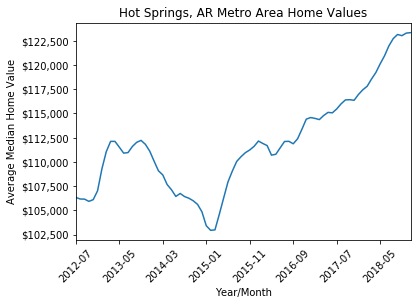

In [335]:
#Create Hot Springs Time Series Plot
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
HS=HSavg1
fig, ax = plt.subplots()
HS.plot()
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xlabel('Year/Month')
plt.xticks(rotation=45) 
plt.ylabel('Average Median Home Value')
plt.title('Hot Springs, AR Metro Area Home Values')
plt.show()

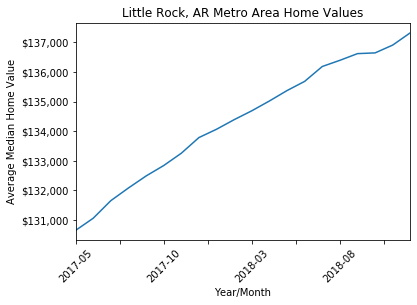

In [336]:
#Create Little Rock Time Series Plot
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
LR=LRavg1
fig, ax = plt.subplots()
LR.plot()
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xlabel('Year/Month')
plt.xticks(rotation=45) 
plt.ylabel('Average Median Home Value')
plt.title('Little Rock, AR Metro Area Home Values')
plt.show()

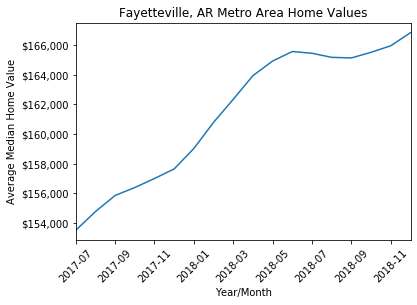

In [337]:
#Create Fayetteville Time Series Plot
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
F=Favg1
fig, ax = plt.subplots()
F.plot()
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xlabel('Year/Month')
plt.xticks(rotation=45) 
plt.ylabel('Average Median Home Value')
plt.title('Fayetteville, AR Metro Area Home Values')
plt.show()

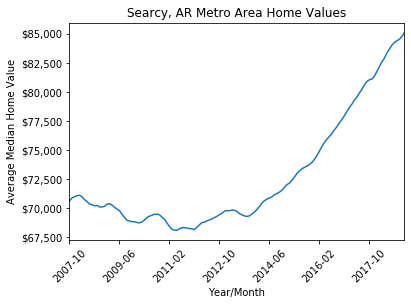

In [338]:
#Create Searcy Time Series Plot
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
S=Savg1
fig, ax = plt.subplots()
S.plot()
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xlabel('Year/Month')
plt.xticks(rotation=45) 
plt.ylabel('Average Median Home Value')
plt.title('Searcy, AR Metro Area Home Values')
plt.show()

In [363]:
#Develop forecasting model
ts=zillow3[6:270]
print(ts.describe())

            zipcode    SizeRank       2017-11       2017-12       2018-01  \
count    264.000000  264.000000  2.640000e+02  2.640000e+02  2.640000e+02   
mean   49954.064394  138.500000  5.282737e+05  5.307601e+05  5.332920e+05   
std    31504.981712   76.354437  6.596852e+05  6.594061e+05  6.579381e+05   
min     2148.000000    7.000000  7.823600e+04  7.874700e+04  7.869600e+04   
25%    21064.250000   72.750000  2.119865e+05  2.134340e+05  2.145105e+05   
50%    43180.000000  138.500000  3.090990e+05  3.118300e+05  3.138855e+05   
75%    78661.500000  204.250000  5.728522e+05  5.776855e+05  5.781898e+05   
max    99301.000000  270.000000  6.425043e+06  6.429009e+06  6.388513e+06   

            2018-02       2018-03       2018-04       2018-05       2018-06  \
count  2.640000e+02  2.640000e+02  2.640000e+02  2.640000e+02  2.640000e+02   
mean   5.358512e+05  5.380692e+05  5.394669e+05  5.401602e+05  5.410935e+05   
std    6.547138e+05  6.525929e+05  6.467208e+05  6.398532e+05  6.3483